In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = True

In [2]:
from kid_readout.measurement.legacy import read
from kid_readout.measurement.io import readoutnc
from kid_readout.measurement import plot_basic

In [3]:
data_directory = '/data/readout/'

nc_broadband = ['2015-05-12_113832_mmw_noise_broadband.nc',  # 9.0
                '2015-05-12_120435_mmw_noise_broadband.nc',  # 8.5
                '2015-05-12_123322_mmw_noise_broadband.nc',  # 8.0
                '2015-05-12_133122_mmw_noise_broadband.nc',  # 7.5
                '2015-05-12_140235_mmw_noise_broadband.nc',  # 7.0
                '2015-05-12_192735_mmw_noise_broadband.nc',  # 6.5
                '2015-05-12_195908_mmw_noise_broadband.nc',  # 6.0
                '2015-05-12_203101_mmw_noise_broadband.nc',  # 5.5
                '2015-05-13_102207_mmw_noise_broadband.nc',  # 5.0
                '2015-05-13_113833_mmw_noise_broadband.nc',  # 4.5
                '2015-05-13_123152_mmw_noise_broadband.nc',  # 4.0
                '2015-05-13_151154_mmw_noise_broadband.nc',  # 3.5
                '2015-05-13_154402_mmw_noise_broadband.nc',  # 3.0
               ]


In [4]:
nc_index = 4
measurement_index = 0
rnc = readoutnc.ReadoutNetCDF(data_directory + nc_broadband[nc_index])
ssa = read.sweepstreamarray_from_rnc(rnc=rnc,
                                     sweep_group_index=measurement_index,
                                     timestream_group_index=measurement_index)

In [6]:
# Channel 8 at 164 MHz was used for the APL paper
channel = 8
sss = ssa[channel]

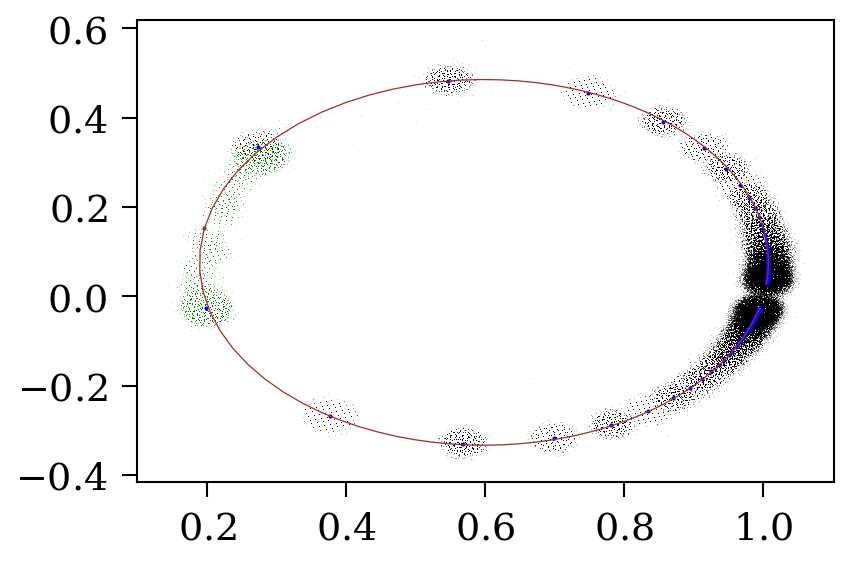

In [7]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss=sss, axis=ax, normalize=True)

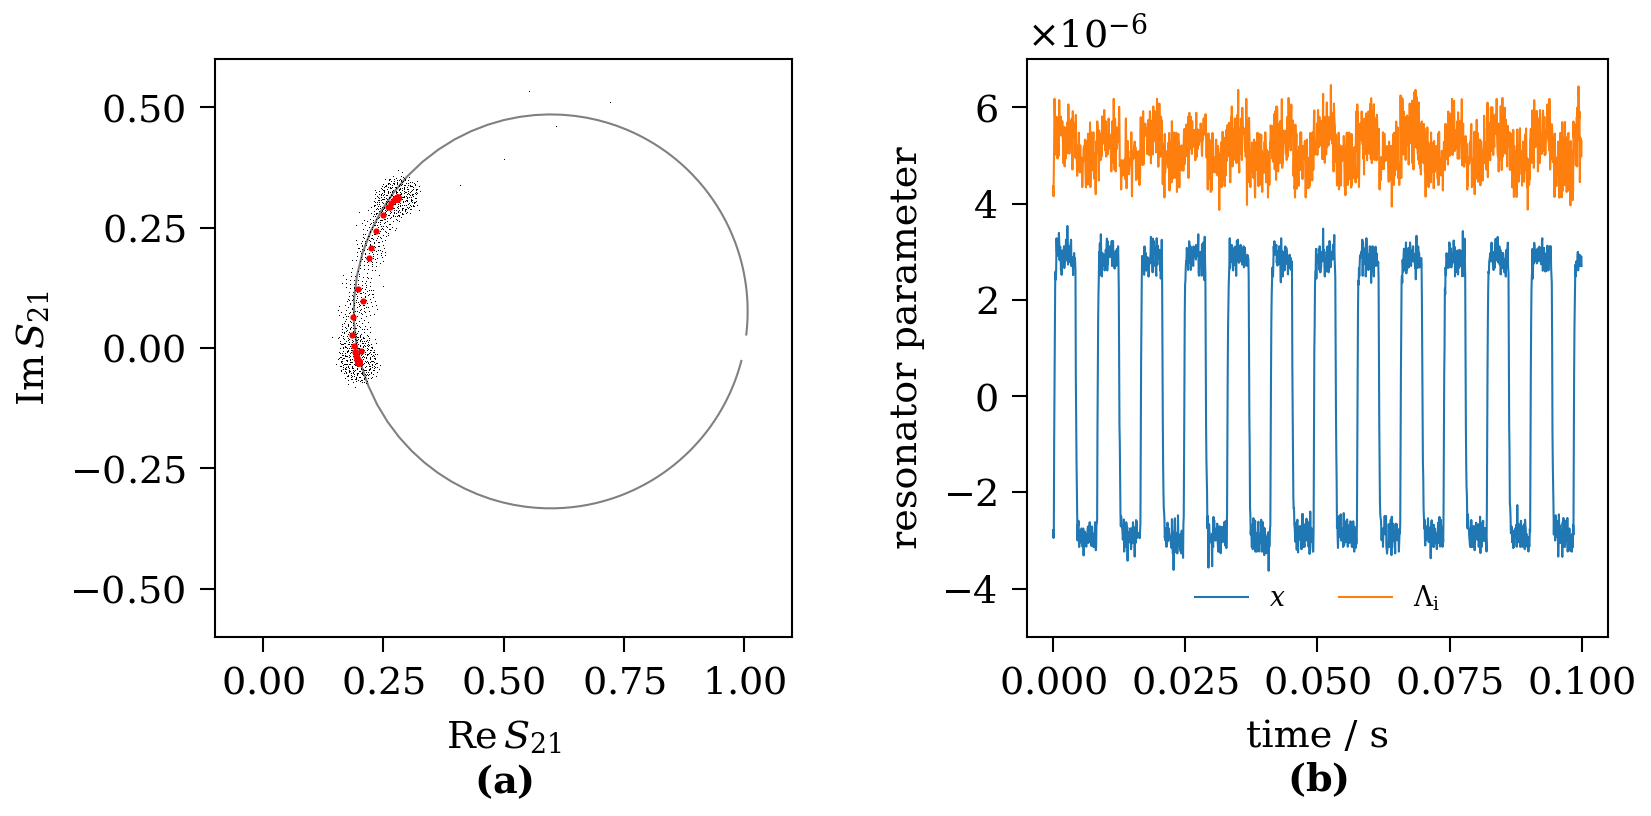

In [21]:
fig, (s21_ax, tod_ax) = plt.subplots(1, 2, figsize=(6, 2.5), gridspec_kw={'wspace': 0.4})

s21_ax.set_aspect('equal', 'box')
rd = sss.resonator.extract(normalize=True)
folded = sss.resonator.remove_background(s21_raw=sss.stream.fold(sss.stream.s21_raw, period_samples=2**7),
                                          frequency=sss.stream.frequency)
s21_ax.plot(rd.s21_model.real, rd.s21_model.imag, color='gray')
s21 = sss.resonator.remove_background(s21_raw=sss.stream.s21_raw, frequency=sss.stream.frequency)
s21_ax.plot(s21.real, s21.imag, ',k')
s21_ax.plot(folded.real, folded.imag, '.r')
s21_ax.set_xlim(-0.1, 1.1)
s21_ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
s21_ax.set_ylim(-0.6, 0.6)
s21_ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
s21_ax.set_xlabel('$\\mathrm{{Re}} \\, S_{{21}}$' + '\n' + '${{\\bf (a)}}$')
s21_ax.set_ylabel('$\\mathrm{{Im}} \\, S_{{21}}$')

tod_sss = sss.epochs(start=sss.stream.epoch + 0, stop=sss.stream.epoch + 0.1)
tod_ax.plot(tod_sss.stream.sample_time, tod_sss.x, label='$x$')
tod_ax.plot(tod_sss.stream.sample_time, tod_sss.q, label='$\Lambda_\mathrm{i}$')
tod_ax.set_ylim(-5e-6, 7e-6)
tod_ax.legend(fontsize='xx-small', loc='lower center', ncol=2)
tod_ax.set_xlabel('time / s' + '\n' + '${{\\bf (b)}}$')
tod_ax.set_ylabel('resonator parameter')


if save:
    fig.savefig(save_directory + 'example_time-ordered_data.pdf')